# Point Cloud to Image Conversion
## Team LeakSeek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Filename Constants
MANIFOLD_PCD_PATH = 'manifold1.pcd.txt'
OUTPUT_IMG_NAME = 'converted_manifold.png'

In [3]:
# Note: The preliminary data in typical point cloud files (i.e., VERSION, FIELDS, ..., DATA) were manually removed and replaced
#   by the "x y z rgb" to define the df columns when CSV is read.
df_orig = pd.read_csv(MANIFOLD_PCD_PATH, sep=' ')
df_orig

,x,y,z,rgb
0,-94.954842,-181.61417,844.00574,4278256129
1,-93.893166,-181.49379,843.03510,4278321922
2,-93.339684,-181.40636,842.70776,4278321922
3,-92.867958,-181.34851,842.40363,4278321922
4,-92.347496,-181.32379,842.35681,4278321922
...,...,...,...,...
99837,-113.892330,122.35071,757.70978,4279504393
99838,-113.416750,122.27309,757.70654,4279373577
99839,-113.035190,122.34882,757.70789,4279438857
99840,-112.553400,122.26440,757.66956,4279176199


In [4]:
# Extract rgb values into separate columns.
# Note: left most bits in rgb column are "alpha" values?
df = df_orig.copy()
df['color'] = df['rgb'].map(lambda rgb: "#{:02x}{:02x}{:02x}".format(rgb >> 16 & 0xff, rgb >> 8 & 0xff, rgb & 0xff))
df['color_rgb'] = df['rgb'].map(lambda rgb: "({}, {}, {})".format(rgb >> 16 & 0xff, rgb >> 8 & 0xff, rgb & 0xff))
df.head()

,x,y,z,rgb,color,color_rgb
0,-94.954842,-181.61417,844.00574,4278256129,#010201,"(1, 2, 1)"
1,-93.893166,-181.49379,843.03510,4278321922,#020302,"(2, 3, 2)"
2,-93.339684,-181.40636,842.70776,4278321922,#020302,"(2, 3, 2)"
3,-92.867958,-181.34851,842.40363,4278321922,#020302,"(2, 3, 2)"
4,-92.347496,-181.32379,842.35681,4278321922,#020302,"(2, 3, 2)"


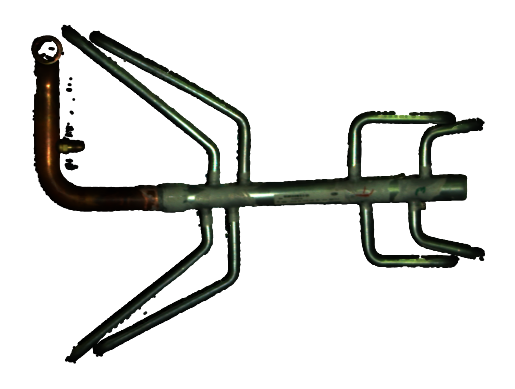

In [5]:
# Plot manifold in 2D.
plt.scatter(df['x'], df['y'], c=df['color'], s=1)
plt.axis('off')
plt.savefig(OUTPUT_IMG_NAME, bbox_inches='tight')
plt.show()